In [1]:
import qiskit

In [2]:
qiskit.__version__

'1.3.1'

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

service=QiskitRuntimeService(channel="ibm_quantum",token="36758aaff7e4e44ff664670269520e0785eeff617d497adee9002511446fe87309124f216ba110ebcd476f618368ba50b85124881a33b191ed2f97a1e8ea07ce")

In [4]:
backend=service.backend(name="ibm_brisbane")

In [5]:
backend.num_qubits

127

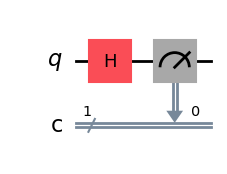

In [31]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 1 qubit and 1 classical bit
qc_h = QuantumCircuit(1, 1)

# Apply the Hadamard gate
qc_h.h(0)

# Measure the qubit and store the result in the classical bit
qc_h.measure(0, 0)

# Draw the circuit
qc_h.draw(output='mpl')


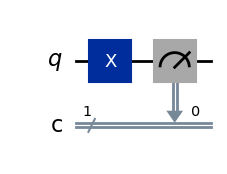

In [23]:
# - Applying the Pauli X gate to |0⟩ results in |1⟩:
#   X|0⟩ = |1⟩

# - Applying the Pauli X gate to |1⟩ results in |0⟩:
#   X|1⟩ = |0⟩

from qiskit import QuantumCircuit

# Create a quantum circuit with 1 qubit and 1 classical bit
qc_x = QuantumCircuit(1, 1)

# Apply a Pauli-X (NOT) gate to the first qubit

qc_x.x(0)

# Measure the first qubit and store the result in the first classical bit
qc_x.measure(0, 0)

qc_x.draw(output='mpl')



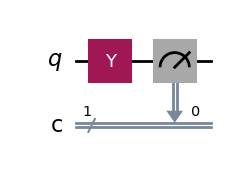

In [24]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 1 qubit and 1 classical bit
qc_y = QuantumCircuit(1, 1)

# Apply Pauli-Y gate (i.e., phase flip + bit flip)
# Y|0⟩ = i|1⟩, Y|1⟩ = -i|0⟩
qc_y.y(0)

# Measure the first qubit and store the result in the first classical bit
qc_y.measure(0, 0)

# Draw the circuit
qc_y.draw(output='mpl')



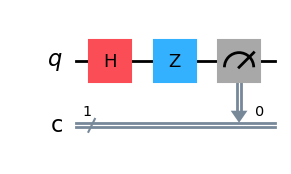

In [27]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 1 qubit and 1 classical bit
qc_z_plus = QuantumCircuit(1, 1)

# Initialize the qubit in the |+> state by applying a Hadamard gate
qc_z_plus.h(0)

# Apply Pauli-Z gate (i.e., phase flip without bit flip)
# Z|+⟩ = |+⟩ (since Z doesn't change the |+⟩ state)
qc_z_plus.z(0)

# Measure the first qubit and store the result in the first classical bit
qc_z_plus.measure(0, 0)

# Draw the circuit
qc_z_plus.draw(output='mpl')



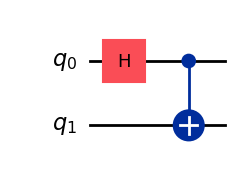

In [28]:
from qiskit import QuantumCircuit

qc=QuantumCircuit(2)

qc.h(0)

qc.cx(0,1)



qc.draw(output='mpl')

Circuit Diagram:


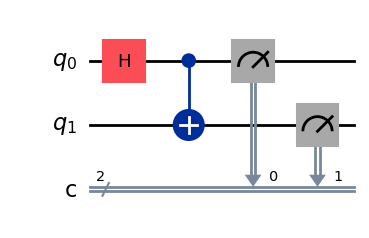

In [16]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate with the first qubit as control and the second as target
qc.cx(0, 1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Draw the circuit
circuit_diagram = qc.draw(output='mpl')
print("Circuit Diagram:")
circuit_diagram


In [7]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')  # Pauli Z on both qubits
ZI = Pauli('ZI')  # Pauli Z on the first qubit, Identity on the second
IZ = Pauli('IZ')  # Pauli Z on the second qubit, Identity on the first
XX = Pauli('XX')  # Pauli X on both qubits
XI = Pauli('XI')  # Pauli X on the first qubit, Identity on the second
IX = Pauli('IX')  # Pauli X on the second qubit, Identity on the first


observables = [ZZ, ZI, IZ, XX, XI, IX]

In [9]:
from qiskit_aer.primitives import Estimator
estimator=Estimator()
job=estimator.run([qc]*len(observables),observables)
job.result()

EstimatorResult(values=array([ 1.        ,  0.03125   ,  0.03125   ,  1.        , -0.00976562,
       -0.00976562]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0167884, 'sample_measure_time': 0.001538, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 3790, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9990234375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0167884, 'sample_measure_time': 0.001538, 'inpu

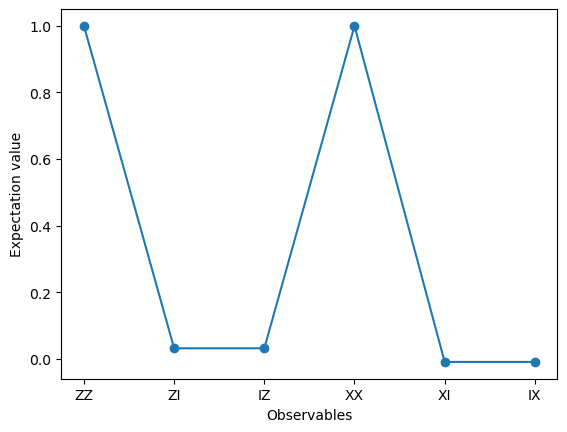

In [10]:
import matplotlib.pyplot as plt
data =['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values=job.result().values

plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()